# 1.0 Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 2.0 Leitura dos Dados

In [2]:
X = pd.read_csv( '../datasets/clustering/X_dataset.csv' )

# 3.0 Testando os melhores parametros

In [3]:
# Definindo os intervalos de parâmetros
valores_k = range(2, 10) 

# Preparando o DataFrame para os resultados
results = pd.DataFrame(columns=['Algoritmo', 'Parametro', 'Silhouette Score'])

# Listas para armazenar os valores do Silhouette Score
silhouette_scores = []

# Testando K-means com diferentes valores de k
for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Treinamento
    labels_kmeans = kmeans.predict(X)  # Atribuição de rótulos aos dados
    silhouette_avg_kmeans = silhouette_score(X, labels_kmeans)
    silhouette_scores.append(silhouette_avg_kmeans)
    print(f"K-means com k={k}: Silhouette Score = {silhouette_avg_kmeans}")

K-means com k=2: Silhouette Score = 0.213219480988304
K-means com k=3: Silhouette Score = 0.23295918228054466
K-means com k=4: Silhouette Score = 0.21624241549307363
K-means com k=5: Silhouette Score = 0.18802173995727178
K-means com k=6: Silhouette Score = 0.21083496114299138
K-means com k=7: Silhouette Score = 0.19755224827205217
K-means com k=8: Silhouette Score = 0.18982095647031746
K-means com k=9: Silhouette Score = 0.17752834135804454


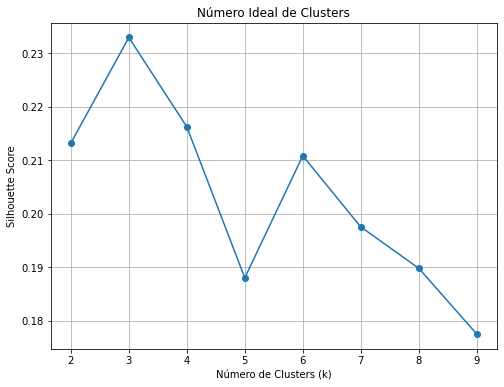

In [4]:
# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(valores_k, silhouette_scores, marker='o')
plt.title('Número Ideal de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [5]:
valores_preference = range(-50,-42)

# Listas para armazenar os valores do Silhouette Score
silhouette_scores = []

# Loop para testar o Affinity Propagation com diferentes valores de 'preference'
for preference in valores_preference:
    affinity_propagation = AffinityPropagation(preference=preference, max_iter=1000)  # Defina um limite para max_iter
    affinity_propagation.fit(X)  # Treinamento

    labels_affinity = affinity_propagation.predict(X)  # Atribuição de rótulos aos dados

    silhouette_avg_affinity = silhouette_score(X, labels_affinity)
    silhouette_scores.append(silhouette_avg_affinity)
    
    print(f"Affinity Propagation com preference={preference}: Silhouette Score = {silhouette_avg_affinity}")

Affinity Propagation com preference=-50: Silhouette Score = 0.20228628926813522
Affinity Propagation com preference=-49: Silhouette Score = 0.20228628926813522
Affinity Propagation com preference=-48: Silhouette Score = 0.20228628926813522
Affinity Propagation com preference=-47: Silhouette Score = 0.20365750456597354
Affinity Propagation com preference=-46: Silhouette Score = 0.16802411383703317
Affinity Propagation com preference=-45: Silhouette Score = 0.1896193434031702
Affinity Propagation com preference=-44: Silhouette Score = 0.1896193434031702
Affinity Propagation com preference=-43: Silhouette Score = 0.1896193434031702


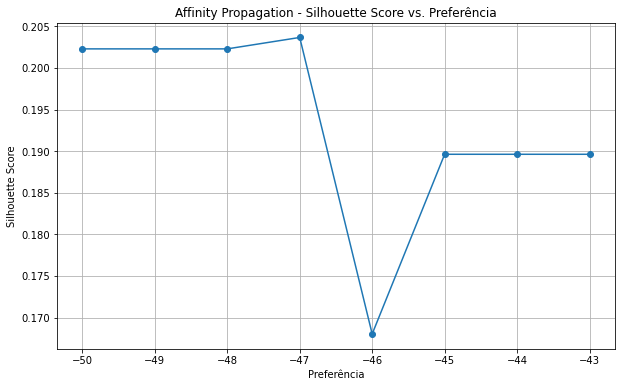

In [6]:
# Plotando o gráfico para determinar o melhor valor de preferência
plt.figure(figsize=(10, 6))
plt.plot(valores_preference, silhouette_scores, marker='o')
plt.title('Affinity Propagation - Silhouette Score vs. Preferência')
plt.xlabel('Preferência')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# 6.0 Treinando os Modelos e Verificando a Performance

In [7]:
# Escolha dos melhores parâmetros
melhor_k = 3  # Melhor valor de 'k' para o K-means

# Treinamento do modelo K-means com os melhores parâmetros
kmeans = KMeans(n_clusters=melhor_k, random_state=42)
kmeans.fit(X)  # Treinamento

# Previsão (atribuição de rótulos) utilizando K-means
labels_kmeans = kmeans.predict(X)
n_clust = len(np.unique(labels_kmeans))

# Cálculo do Silhouette Score para o K-means
silhouette_avg_kmeans = silhouette_score(X, labels_kmeans)
print(f"Numero de Clusters = {n_clust}: Silhouette Score = {silhouette_avg_kmeans}")


Numero de Clusters = 3: Silhouette Score = 0.23295918228054466


In [8]:
melhor_preference = -47  # Melhor valor de 'preference' para o Affinity Propagation

# Treinamento do modelo Affinity Propagation com os melhores parâmetros
affinity_propagation = AffinityPropagation(preference=melhor_preference)
affinity_propagation.fit(X)  # Treinamento

# Previsão (atribuição de rótulos) utilizando Affinity Propagation
labels_affinity = affinity_propagation.predict(X)
n_clust = len(np.unique(labels_affinity))

# Cálculo do Silhouette Score para o Affinity Propagation
silhouette_avg_affinity = silhouette_score(X, labels_affinity)
print(f"Numero de Clusters = {n_clust}: Silhouette Score = {silhouette_avg_affinity}")

Numero de Clusters = 7: Silhouette Score = 0.20365750456597354
